In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## `1` Bar Charts

A bar chart is used to depict the distribution of a **`categorical variable.`** In a bar chart, each level of the categorical variable is depicted with a bar, whose height indicates the frequency of data points that take on that level. A basic bar chart of frequencies can be created through the use of **`seaborn's countplot function`**:

In [41]:
df = pd.read_csv('data/pokemon.csv')
print(df.shape)
df.head(5)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


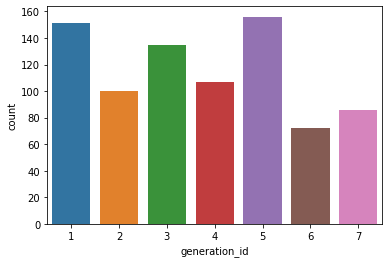

In [42]:
sns.countplot(data = df, x = 'generation_id'); 

By default, each category is given a different color. This might come in handy for building associations between these category labels and encodings in plots with more variables. Otherwise, it's a good idea to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color. This can be set using the "color" parameter:

color_palette returns a list of RGB tuples. Each tuple consists of three digits specifying the red, green, and blue channel values to specify a color. Calling this function without any parameters returns the current / default palette, and we take the first color to be the color for all bars.

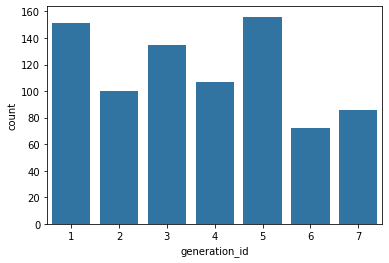

In [43]:
base_color = sns.color_palette()[0]
sns.countplot(data = df, x = 'generation_id', color = base_color); 

One thing that we might want to do with a bar chart is to sort the data in some way. For nominal-type data, one common operation is to sort the data in terms of frequency. With our data in a pandas DataFrame, we can use various DataFrame methods to compute and extract an ordering, then set that ordering on the "order" parameter:

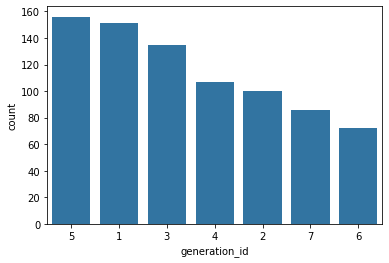

In [50]:
pareto_order = df['generation_id'].value_counts(ascending=False).index
#print(pareto_order)

sns.countplot(data = df, x = 'generation_id', color = base_color, order = pareto_order);

For **`ordinal-type data`**, we probably want to sort the bars **in order of the variables**. 

While we could sort the levels by frequency like above, we usually care about whether the most frequent values are at high levels, low levels, etc. The best thing for us to do in this case is to convert the column into an ordered categorical data type. By default, pandas reads in string data as object types, and will plot the bars in the order in which the unique values were seen. By converting the data into an ordered type, the order of categories becomes innate to the feature, and we won't need to specify an "order" parameter each time it's required in a plot.

In [51]:
# ordered_cat = pd.CategoricalDtype(categories = pareto_order, ordered = True)
# ordered_cat

CategoricalDtype(categories=[5, 1, 3, 4, 2, 7, 6], ordered=True)

If you have **a lot of category levels**, or **the category names are long**, 

then you might end up with overcrowding of the tick labels. One way to address this is through creation of a horizontal bar chart. In a horizontal bar chart, it is the length of each bar that indicates frequency, rather than the height. In the code, instead of setting the data or variable on the "x" parameter, you can set the variable to be plotted on the parameter "y":

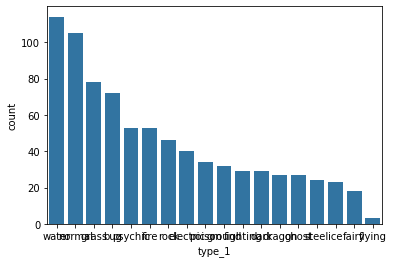

In [54]:
type1_order = df['type_1'].value_counts().index
sns.countplot(data = df, x = 'type_1', color = base_color, order = type1_order);

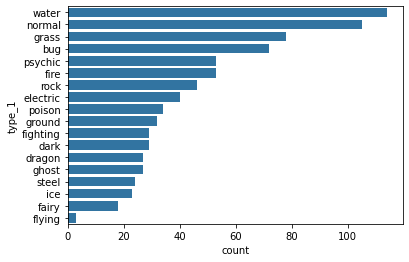

In [55]:
# simply changed x axis to y axis
sns.countplot(data = df, y = 'type_1', color = base_color, order = type1_order);

### `Applications` Absolute vs. Relative Frequency

By default, seaborn's countplot function will summarize and plot the data in terms of absolute frequency, or pure counts. In certain cases, you might want to understand the distribution of data or want to compare levels in terms of proportions of the whole. In this case, you will want to plot the data in terms of relative frequency, where the height indicates the proportion of data taking each level, rather than the absolute count.

One method of plotting the data in terms of **`relative frequency`** on a bar chart is to just relabel the counts axis in terms of proportions. The underlying data will be the same, it will simply be the scale of the axis ticks that will be changed.

In [ ]:
# we will use plt.xticks(ticks,labels,**kwargs) / plt.yticks
# so we need collecting ticks and labels

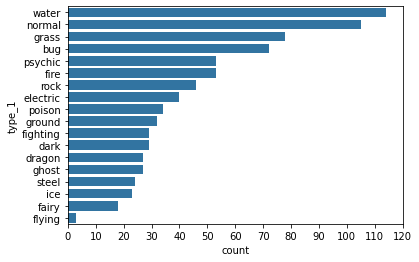

In [72]:
# to collect ticks we need making np.arange(min, max, interval)
total_num = df.shape[0]
max_tick = df['type_1'].value_counts().max()
min_tick = 0
ticks = np.arange(0, maximum+10, 10)

sns.countplot(data = df, y = 'type_1', color = base_color, order = type1_order);
plt.xticks(ticks = ticks, labels = ticks);

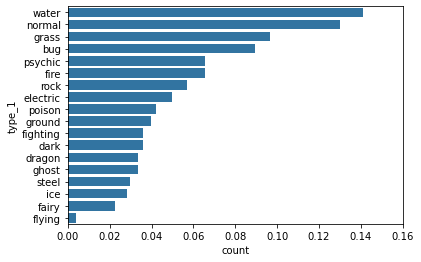

In [83]:
# get proportion taken by most common group for derivation
# of tick marks
total_num = df.shape[0]
max_relative = max_tick / total_num
relative_ticks = np.arange(0, max_relative+0.02, 0.02)
relative_labels = ['{:.2f}'.format(label) for label in relative_ticks]
#print(relative_ticks, relative_labels)

sns.countplot(data = df, y = 'type_1', color = base_color, order = type1_order);
plt.xticks(ticks = relative_ticks * total_num, labels = relative_labels);

The xticks and yticks functions aren't only about rotating the tick labels. 

You can also get and set their locations and labels as well. The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

### `Applications` Additional Variation

Rather than plotting the data on a relative frequency scale, you might use **`text annotations`** to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.

In [88]:
total_num = df.shape[0]
max_relative = max_tick / total_num
relative_ticks = np.arange(0, max_relative+0.02, 0.02)
relative_labels = ['{:.2f}'.format(label) for label in relative_ticks]

In [96]:
pct_values = df['type_1'].value_counts().values 
pct_index = df['type_1'].value_counts().index

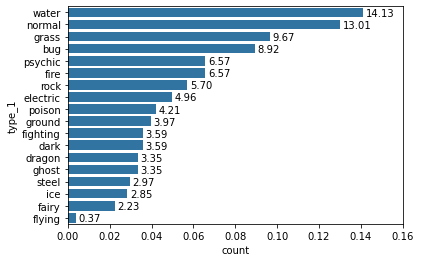

In [107]:
sns.countplot(data = df, y = 'type_1', color = base_color, order = type1_order);
plt.xticks(ticks = relative_ticks * total_num, labels = relative_labels);

for i in range(len(pct_values)):
    x_value = pct_values[i]
    string = '{:.2f}'.format(pct_values[i] / total_num * 100)
    plt.text(x = x_value+1 , y = i+0.3, s = string);

### `Applications` Counting Missing Data
One interesting way we can apply bar charts is through the visualization of missing data. We can use pandas functions to create a table with the number of missing values in each column.

`Seaborn` Barplot requires both x and y axis values.

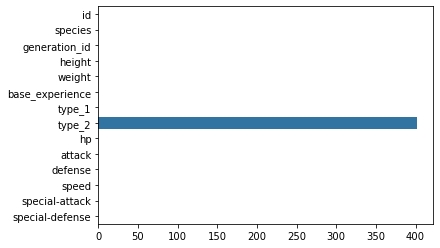

In [126]:
na_counts = df.isna().sum()
base_color = sns.color_palette()[0]
sns.barplot(x = na_counts, y = na_counts.index, color = base_color);

As a general note, this is a useful function to keep in mind if your data is summarized and you still want to build a bar chart. 

If your data is not yet summarized, however, just use the countplot function so that you don't need to do extra summarization work. In addition, you'll see what barplot's main purpose is in the next lesson, when we discuss adaptations of univariate plots for plotting bivariate data.

---

## `2` Pie Charts
A pie chart is a common **`univariate plot type`** that is used to depict **`relative frequencies`** for levels of a **`categorical variable`**. Frequencies in a pie chart are depicted as wedges drawn on a circle: the larger the angle or area, the more common the categorical value taken.

Unfortunately, pie charts are a fairly limited plot type in the range of scenarios where they can be used, and it is easy for chart makers to try and spice up pie charts in a way that makes them more difficult to read. If you want to use a pie chart, try to follow certain guidelines:

- Make sure that your interest is in relative frequencies. Areas should represent parts of a whole, rather than measurements on a second variable (unless that second variable can logically be summed up into some whole).
- Limit the number of slices plotted. A pie chart works best with two or three slices, though it's also possible to plot with four or five slices as long as the wedge sizes can be distinguished. If you have a lot of categories, or categories that have small proportional representation, consider grouping them together so that fewer wedges are plotted, or use an 'Other' category to handle them.
- Plot the data systematically. One typical method of plotting a pie chart is to start from the top of the circle, then plot each categorical level clockwise from most frequent to least frequent. If you have three categories and are interested in the comparison of two of them, a common plotting method is to place the two categories of interest on either side of the 12 o'clock direction, with the third category filling in the remaining space at the bottom.

If these guidelines cannot be met, then you should probably make use of a bar chart instead. A bar chart is a safer choice in general. The bar heights are more precisely interpreted than areas or angles, and a bar chart can be displayed more compactly than a pie chart. There's also more flexibility with a bar chart for plotting variables with a lot of levels, like plotting the bars horizontally.


In [173]:
counts = df['generation_id'].value_counts().values
index = df['generation_id'].value_counts().index

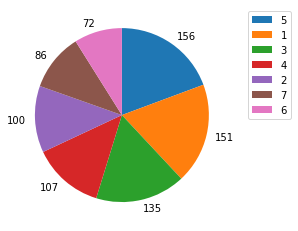

In [176]:
plt.pie(x = counts, labels=counts, counterclock=False, startangle=90);
plt.legend(labels=index, loc='upper right', bbox_to_anchor=(0.5, 0., 0.8, 1));

#### To follow the guidelines in the bullet points above, I include the "startangle = 90" and "counterclock = False" arguments to start the first slice at vertically upwards, and will plot the sorted counts in a clockwise fashion. 

The axis function call and **'square' argument** makes it so that the scaling of the plot is **equal on both the x- and y-axes**. Without this call, the pie could end up looking oval-shaped, rather than a circle.

### `Application` Additional Variation

A sister plot to the pie chart is the **`donut plot`**. It's just like a pie chart, except that there's a hole in the center of the plot. Perceptually, there's not much difference between a donut plot and a pie chart, and donut plots should be used with the same guidelines as a pie chart. Aesthetics might be one of the reasons why you would choose one or the other. For instance, you might see statistics reported in the hole of a donut plot to better make use of available space.

To create a donut plot, you can add a **"wedgeprops" argument** to the pie function call. By default, the radius of the pie (circle) is 1; setting the wedges' width property to less than 1 removes coloring from the center of the circle.

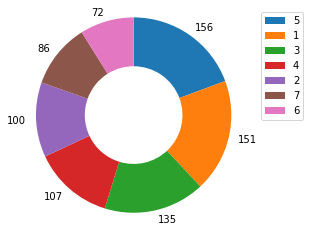

In [183]:
plt.pie(x = counts, labels=counts, counterclock=False, startangle=90,
        wedgeprops={'width':0.5});
plt.legend(labels=index, loc='upper right', bbox_to_anchor=(0.5, 0., 0.8, 1));
plt.axis('square');

---

## `3` Histogram

A histogram is used to plot the distribution of a numeric variable. It's the quantitative version of the bar chart. However, rather than plot one bar for each unique numeric value, values are grouped into continuous bins, and one bar for each bin is plotted depicting the number. For instance, using the default settings for matplotlib's hist function:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv('data/pokemon.csv')

In [5]:
df.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


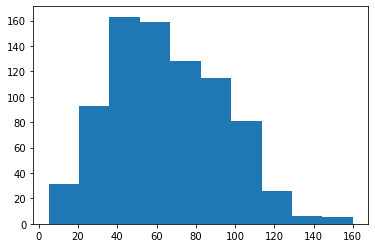

In [6]:
plt.hist(df['speed']);

Bin size matters!

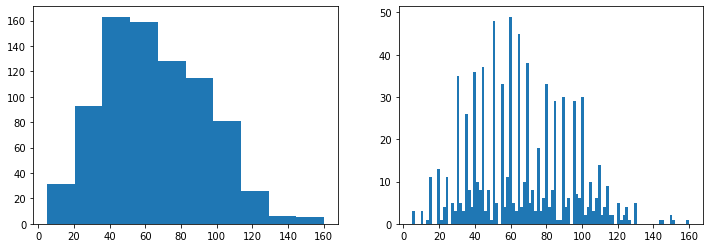

In [17]:
plt.figure(figsize = (12,4))
plt.subplot(1,2,1);
plt.hist(df['speed'], bins = 10);

plt.subplot(1,2,2);
plt.hist(df['speed'], bins = 100);

You can use descriptive statistics (e.g. via df['num_var'].describe()) to gauge what minimum and maximum bin limits might be appropriate for the plot. These bin edges can be set using numpy's arange function:

The first argument to arange is the leftmost bin edge, the second argument the upper limit, and the third argument the bin width. **Note that even though I've specified the "max" value in the second argument, I've added a "+1" (the bin width).**

That is because arange will only return values that are strictly less than the upper limit. Adding in "+1" is a safety measure to ensure that the rightmost bin edge is at least the maximum data value, so that all of the data points are plotted. The leftmost bin is set as a hardcoded value to get a nice, interpretable value, though you could use functions like numpy's around if you wanted to approach that end programmatically.


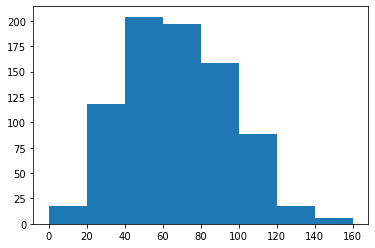

In [11]:
bin_edges = np.arange(0, df['speed'].max() + 20, 20)
plt.hist(df['speed'], bins=bin_edges);

The histogram is the most immediate choice since the data is numeric, but there's one particular consideration to make regarding the bin edges. Since data points fall on set values, it can help to reduce ambiguity by putting bin edges between the actual values taken by the data. Your readers may not know that values on bin edges end up in the bin to their right, so this can help remove potential confusion when they interpret the plot. 

Compare the two visualizations of 100 random die rolls below (in die_rolls), with bin edges _on_ the values in the left subplot, and bin edges in between values in the right subplot.

In [18]:
a = np.random.randint(low = 1, high = 7, size = 100)
b = np.random.randint(low = 1, high = 7, size = 100)
die_rolls = np.array(a + b)

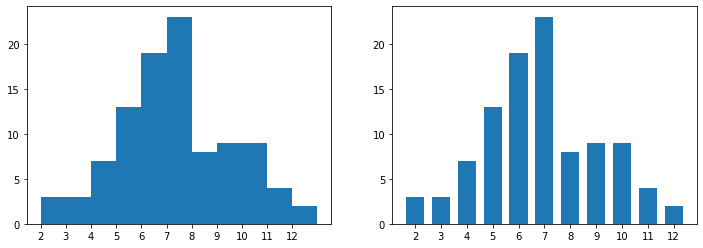

In [21]:
plt.figure(figsize = [12, 4])

plt.subplot(1, 2, 1)
bin_edges = np.arange(2, 12+1.1, 1) # note 1.1, described the reason in below text
plt.hist(die_rolls, bins = bin_edges); 
plt.xticks(np.arange(2, 12+1, 1)); # ticks by unit of 1

plt.subplot(1, 2, 2)
bin_edges = np.arange(1.5, 12.5+1, 1)
plt.hist(die_rolls, bins = bin_edges, rwidth = .7); 
plt.xticks(np.arange(2, 12+1, 1));

You'll notice for the left histogram, in a deviation from the examples that have come before, I've added 1.1 to the max value (12) for setting the bin edges, rather than just the desired bin width of 1. Recall that data that is equal to the rightmost bin edge gets lumped in to the last bin. This presents a potential problem in perception when a lot of data points take the maximum value, and so is especially relevant when the data takes on discrete values. The 1.1 adds an additional bin to the end to store the die rolls of value 12 alone, to avoid having the last bar catch both 11 and 12.

**Alternatively to the histogram, consider if a bar chart with non-connected bins might serve your purposes better.** The plot below takes the code from before, but adds the "rwidth" parameter to set the proportion of the bin widths that will be filled by each histogram bar.

With "rwidth" set to 0.7, the bars will take up 70% of the space allocated by each bin, with 30% of the space left empty. This changes the default display of the histogram (which you could think of as "rwidth = 1") into a bar chart. **By adding gaps between bars, you emphasize the fact that the data is discrete in value.** 

**On the other hand, plotting your quantitative data in this manner might cause it to be interpreted as ordinal-type data, which can have an effect on overall perception.**

For **`continuous numeric data`**, you should **not** make use of the "rwidth" parameter, since the gaps imply discreteness of value. 

**As another caution,** it might be tempting to use seaborn's countplot function to plot the distribution of a discrete numeric variable as bars. Be careful about doing this, since each unique numeric value will get a bar, regardless of the spacing in values between bars. (For example, if the unique values were {1, 2, 4, 5}, missing 3, countplot would only plot four bars, with the bars for 2 and 4 right next to one another.) Also, even if your data is technically discrete numeric, you should probably not consider either of the variants depicted on this page unless the number of unique values is small enough to allow for the half-unit shift or discrete bars to be interpretable. 

#### If you have a large number of unique values over a large enough range, it's better to stick with the standard histogram than risk interpretability issues.

While you might justify plotting discrete numeric data using a bar chart, you’ll be less apt to justify the opposite: plotting ordinal data as a histogram. The space between bars in a bar chart helps to remind the reader that values are not contiguous in an ‘interval’-type fashion: only that there is an order in levels. With that space removed as in a histogram, it's harder to remember this important bit of interpretation.

### seaborn also has .distplot 

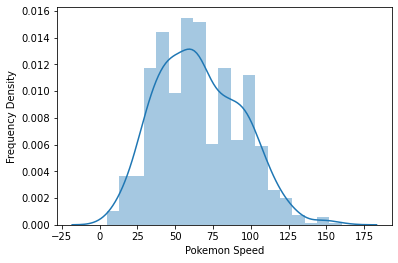

In [32]:
#bin_edges = np.arange(0, df['speed'].max()+20, 20)
sns.distplot(a = df['speed'], kde = True)#, bins=bin_edges);

plt.ylabel('Frequency Density') # as statistical terms when used with kde
plt.xlabel('Pokemon Speed');

The `distplot` function has built-in rules for specifying histogram bins, and by default plots a curve depicting the kernel density estimate (KDE) on top of the data. The vertical axis is based on the KDE, rather than the histogram: you shouldn't expect the total heights of the bars to equal 1, but the area under the curve should equal 1. 

Despite the fact that the default bin-selection formula used by distplot might be better than the choice of ten bins that .hist uses, you'll still want to do some tweaking to align the bins to 'round' values. You can use other parameter settings to plot just the histogram and specify the bins like before:

#### In summary, 

if your exploration is only interested in the histogram-depiction of the data, and not the additional functionality offered by distplot, then you might be better off with just using Matplotlib's hist function for simplicity. On the other hand, if you want a quick start on choosing a representative bin size for histogram plotting, you might take a quick look at the basic distplot first before getting into the customization.